In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

C:\Users\Hp\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
# Helper libnraries
import numpy as np
import matplotlib.pyplot as plt

In [8]:

fashion_mnist = keras.datasets.fashion_mnist

In [10]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [12]:
#Tells us about the array
train_images.shape

(60000, 28, 28)

In [13]:
#Tells us the number of labels
len(train_labels)

60000

In [14]:
#Examine the Labels: Tell us that  label is an integer between 0 and 9
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
test_images.shape

(10000, 28, 28)

In [16]:
test_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [17]:
len(test_labels)

10000

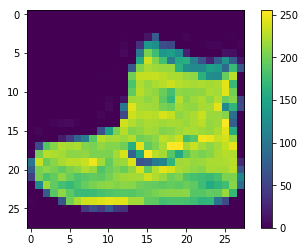

In [18]:
#Plot the first image. 
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [19]:
#Pixel values are in the range of 0 to 255. Scale to range of 0 to 1 by dividing by 255
train_images = train_images / 255.0
test_images = test_images / 255.0

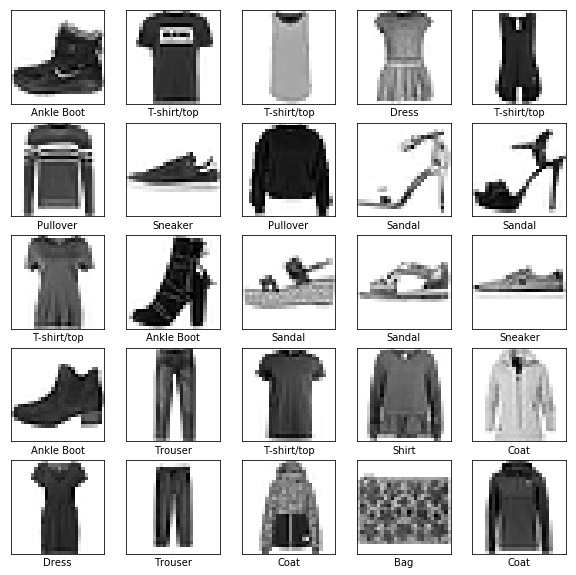

In [22]:
#Display the first 25 images from the training set and show the class name below each image
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [23]:
#Build the model: 1. Set up Layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [24]:
#Build the model: 2. Compile the model
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics =['accuracy'])

In [25]:
#Train the model
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.4976 - acc: 0.8239
Epoch 2/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.3751 - acc: 0.8657
Epoch 3/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.3344 - acc: 0.8783
Epoch 4/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.3107 - acc: 0.8862
Epoch 5/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.2934 - acc: 0.8919


In [27]:
#Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy: ', test_acc)

10000/10000 [==============================] - 0s 30us/step
Test Accuracy:  0.8734


In [28]:
#Make predictions
predictions = model.predict(test_images)

In [29]:
predictions[0]

array([9.7189513e-07, 1.8792399e-09, 3.4053521e-08, 1.7690194e-09,
       9.5745074e-09, 4.4989810e-04, 4.1094236e-07, 1.7512571e-02,
       4.8042452e-06, 9.8203135e-01], dtype=float32)

In [30]:
np.argmax(predictions[0])

9